<h1>Iris Veri Setiyle Yapay Zeka Uygulaması</h1>

İlk önce veri setimizi manipüle edeceğiz ve var olan sorunları incelemek ve ortadan kaldırmak için kütüphanelerimizi dahil edeceğiz.

In [2]:
import pandas

df = pandas.read_csv('iris.csv')

Veri setimizi okuduktan sonra verimiz hakkında bilgi edinme çalışmalarına başlayabiliriz. Öncelikle benim “veriye ilk bakış metodu” dediğim bir metodu uygulayacağız. Verinin ilk 5 veya son 5 elemanına bir göz atacağız ve böylelikle veri hakkında genel bilgiye sahip olacağız.

In [4]:
df.head()
#df.tail() son 5 elemanı gösterir.
#Eğer df.head(10) gibi bir parametre yazarsak ilk 10 elemanı görebiliriz.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


__Veriye ilk bakış metodunu uyguladığımıza göre artık veriyi daha ayrıntılı bir şekilde inceleyebiliriz. Siz de fark etmişsinizdir, daha kullanabileceğimiz bir sürü metot ve pandas fonksiyonu var; ancak biz hepsini kullanmayacağız.__

In [5]:
df.describe() #Veri hakkında istatiksel bilgi elde etmek için kullanılır.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info() #info fonksiyonu her özellik (feature) için null olmayan satır bilgisini ve özellik türünü belirtir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [7]:
df.shape #(satır sayısı, sütun sayısı)
#df.shape[0] satırlar için
#df.shape[1] sütunlar için

(150, 6)

Daha önce de söylediğim gibi, daha birçok veri manipülasyonu ve veriyi incelemek için kullanabileceğimiz fonksiyon var; ama bizim kullanacaklarımız bunlar. Şu ana kadar yaptıklarımızla _gereksiz bir özelliğimizin (ID sütunu) olduğunu öğrendik. ID sütunu eğiteceğimiz makine öğrenme modeli için bir sorun teşkil edebilir,_ çünkü ID sütunu modelimiz için gerekli bir bilgi değil. Ayrıca, pandas.DataFrame bize zaten ID sütununa benzer bir indeksleme sağlıyor, bu yüzden veri setimizi temizlemeliyiz; yani ID sütununu DataFrame’den silmeliyiz.

In [8]:
df = df.drop("Id",axis=1) #axis = 1 yazmamızın nedeni sütunu silmek istiyor olmamız.

Veri setimizdeki tüm sorunları ortadan kaldırdık ve veri hakkında az çok bilgiye sahip olduk. Artık verimizi görselleştirmeye ve grafikleri analiz etmeye başlayabiliriz. Görselleştirme için kullanabileceğimiz bir sürü kütüphane var. Çeşitliliği sağlamak adına görselleştirme için birkaç tane önemli ve çok kullanılan kütüphaneden yararlanacağım.

In [9]:
import seaborn 
#https://seaborn.pydata.org

<h3>Seaborn Kütüphanesinin Sağladığı Bir Kolaylık</h3>

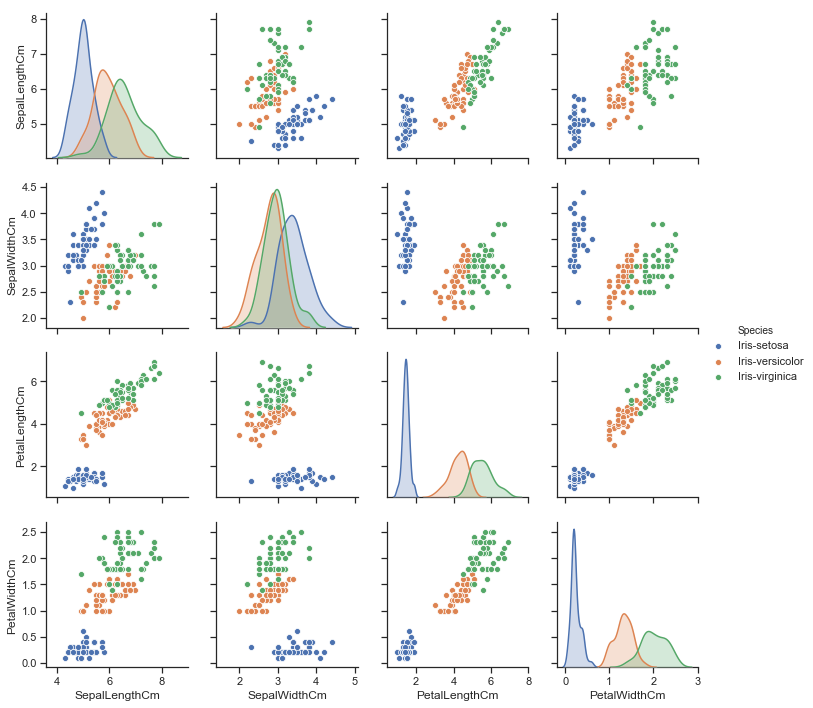

In [11]:
seaborn.set(style = "ticks")

seaborn.pairplot(df,hue="Species")

Grafikleri incelediğimizde tüm özelliklerimizin birbirleriyle karşılaştırıldığını göreceğiz. Aynı grafiği kullanarak tüm çiçek türlerimizi analiz edebiliyoruz. Ayrı ayrı subplotları çizip birleştirmemize gerek kalmıyor, Seaborn bunu bizim için hallediyor.

<h3>Plotly Kütüphanesiyle Görselleştirme</h3>

Kütüphaneyi çevrimdışı kullanmaya çalıştığımız için hücre çalıştırılmadığı taktirde kullanmamız mümkün olmayacaktır. Bu nedenle paylaştığım grafiği siz github.com’da göremeyebilirsiniz. Ancak eğer isterseniz gerekli kütüphaneleriniz varsa kaynak kodu yazdığınızda her tür için 4 bar oluşturan grouped-bar grafiğini görebilirsiniz ve eğer grafiği çevrimiçi halde görmek isterseniz aşağıdaki linke tıklayabilirsiniz.

[Resmi görmek için tıklayınız.](https://i.hizliresim.com/8a8Y17.png)

In [ ]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


init_notebook_mode(connected=True)

import plotly.graph_objs as go

#Şimdi tüm özelliklerimiz için bar grafiği çıkaracağız.

pl_bar = go.Bar(x= df.Species ,y = df.PetalLengthCm,name= 'Petal Length Cm')
pw_bar = go.Bar(x = df.Species ,y = df.PetalWidthCm,name = 'Petal Width Cm')
sl_bar = go.Bar(x = df.Species ,y =df.SepalLengthCm,name = 'Sepal Length Cm')
sw_bar = go.Bar(x = df.Species , y=df.SepalWidthCm , name = 'Sepal Width Cm')

data = [pl_bar,pw_bar,sl_bar ,sw_bar]
layout = go.Layout(barmode = 'group')

fig = go.Figure(data = data ,layout = layout)
iplot(fig,filename='grouped-bar')


#Plotly Kütüphanesi'nin çevrimdışı kullanımını gösterdik. Bu kütüphane bir sürü çeşitli grafik bulunduruyor. 
#Kullandığım dokümantasyon plotlyin orijinal dokümantasyonudur.
#www.plot.ly/python

<h1>Makine Öğrenme Modeli Oluşturma</h1>

Şimdi oluşturacağımız makine öğrenme modeli hakkında konuşmaya başlayabiliriz. Verimiz hakkında bilgi edindik, veriyi görselleştirdik ve görselleştirdiğimiz grafikleri inceledik. Artık modelimiz ile ilgili kesin kararlar verebiliriz. Modelimizi _Denetimli Öğrenme (Supervised Learning)_ metoduyla eğiteceğiz. Veri setimizde iris-setosa, iris-versicolor ve iris-virginica olmak üzere üç etiketimiz var. Bu yüzden _Denetimli Öğrenme_ metodunu kullanacağız. <br>

_Denetimli Öğrenme_ metodunu uygulamak için de problemimizin bir _Sınıflandırma (Classification)_ problemi mi, yoksa _Regresyon (Regression)_ problemi mi olduğuna karar vermemiz gerek. Bizim problemimiz bir _Sınıflandırma_ problemi, çünkü veri setimiz üç ayrı sınıfa ayrılmış durumda: iris-setosa, iris-versicolor ve iris-virginica. <br>

Problemimiz hakkında bilmemiz gereken her şeyi biliyoruz ve modelimizi oluşturmak için hazırız. Ancak, başka bir sorunumuz daha var. Hangi makine öğrenme algoritmasını kullanmalıyız? Bu noktada kesin bir şey söylemek yanlış olabilir. En yüksek başarı oranına sahip modeli elde edebilmek için modeli birkaç farklı algoritmayla eğitip modelleri karşılaştırarak hangi algoritmanın daha iyi sonuç verdiğine bakacağız. Ardından, en iyi sonucu sağlayan algoritmaya odaklanacağız.<br>

___*Eğer başlangıç seviyesinde değilseniz aşağıda verdiğim tüm makine öğrenmesi algoritmalarını daha ayrıntılı bir şekilde incelemenizi tavsiye ederim, ben açıklamaları yeni işin içine girmiş kişilere yönelik yaptım.___

<h2>Lojistik Regresyon (Logistic Regression)</h2>

Başlık nedeniyle “Sınıflandırma problemi çözmüyor muyduk, neden regresyon algoritması kullanıyoruz?” diyebilirsiniz, ama lojistik regresyon algoritması sınıflandırma problemlerinde kullanılan bir algoritmadır.

<h3>İkili Lojistik Regresyon (Binary Logistic Regression)</h3>

Bu algoritma 0 ve 1 çıktılarıyla ikili sınıflandırma sağlar. Örneğin, bir e-postayı spam veya spam değil olarak veya bir denklemi doğru veya yanlış olarak sınıflandırır. <br>

Regresyon olmasının nedeni her zaman 0 ve 1 gibi belirli çıktılar vermemesidir.

<h3>Çok Değişkenli Lojistik Regresyon (Multinomial Logistic Regression)</h3>

Üç veya daha fazla kategoriye sahip verileri sınıflandırmak için kullanılan bir _Logistic Regression_ yöntemidir. <br>

Artık modelimizi bu lojistik regresyon algoritmasıyla yaratmak için yeterli bilgiye sahibiz.

In [15]:
#Makine öğrenmesi algoritmaları için Google'ın Scikit-Learn Kütüphanesi'ni kullanacağız.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(df.drop("Species",axis=1),df.Species,test_size = 0.2)
#Veriyi 0,8 oranında eğitim ve 0,2 oranında test verisi olarak böldük
#x sayısal veri, y etiket
#Ayrıntılı bilgi için Scikit-Learn orijinal dokümantasyonuna bakınız.

In [16]:
base_iris_logistic = LogisticRegression()

base_iris_logistic.fit(train_X,train_y)

c:\users\lacin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lacin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
base_model_predicts = base_iris_logistic.predict(test_X)
print('Accuracy from base model train data : {0}'.format(base_iris_logistic.score(train_X,train_y)))
print('Accuracy from base model test data: {0}'.format(base_iris_logistic.score(test_X,test_y)))

Accuracy from base model train data : 0.95
Accuracy from base model test data: 0.9666666666666667


In [18]:
custom_iris_logistic = LogisticRegression(multi_class='multinomial',solver = 'newton-cg')

custom_iris_logistic.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
custom_model_predicts = custom_iris_logistic.predict(test_X)
print('Accuracy from custom model train data : {0}'.format(custom_iris_logistic.score(train_X,train_y)))
print('Accuracy from custom model test data : {0}'.format(custom_iris_logistic.score(test_X,test_y)))

Accuracy from custom model train data : 0.9583333333333334
Accuracy from custom model test data : 0.9666666666666667


In [20]:
#Modelin yüzde cinsinden bilirlik oranını hesaplıyoruz.

base_model_accuracy = base_iris_logistic.score(test_X,test_y)*100
custom_model_accuracy = custom_iris_logistic.score(test_X,test_y)*100

Modelimizin bilirlik oranını elde ettiğimize göre artık bu oranları bir grafikte karşılaştırabiliriz. Bunu yapmak için daha önce kullandığımızdan farklı bir grafik kütüphanesi kullanacağız.

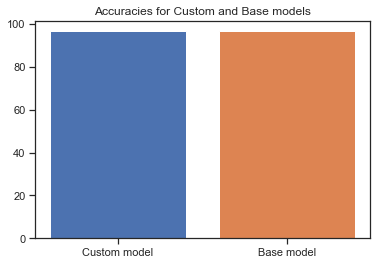

In [21]:
import matplotlib.pyplot as plt

plt.bar("Custom model",custom_model_accuracy)
plt.bar("Base model",base_model_accuracy)
plt.yticks([0,20,40,60,80,100])
plt.title('Accuracies for Custom and Base models')
plt.show()

Modelimizi varsayılan	 lineer regresyon algoritmasıyla ve varsayılan ve özel parametrelerle eğittik. Test verileri için hangisinin daha iyi sonuç verdiğini gördük. Bu sefer özelleştirilmiş parametre daha iyi sonuç verdi, ama bilirlik oranı eğitim verileri ve test verilerine göre değişiklik gösterebilir.

<h2>K-En Yakın Komşu Algoritması (K-Nearest Neighbor Algorithm (KNN))</h2>

KNN de bir sınıflandırma algoritması ve bizim problemimiz için uygun bir algoritma. Bu algoritma veri setimize göre yapılan tahmine en yakın K sayısı kadar (özel olarak seçilmiş bir sayı) komşu bulur. Komşuların hangi sınıflara dahil olduğunu dikkate alarak bir karar verir ve bir cevap bulur. <br>

Komşuları bulmak için _Öklid Uzaklığı_ kullanılabilir.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#Kütüphanemizi dahil ettikten sonra modelimizi oluşturabiliriz.

iris_knn = KNeighborsClassifier(n_neighbors = 3) #K komşu sayısı

iris_knn.fit(train_X,train_y) #Modelimizi eğitim verilerine göre eğittik.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

KNN algoritmasında komşu sayısı modelimizin bilirlik oranı için önemlidir. Eğer komşu sayısı yeterli değilse modelimizin fazla güvenilir olmaz. Eğer komşu sayısı çok fazlaysa, model overfitting yaşar ve benzer şekilde, bu da modelin güvenilirliğini azaltır. Ayrıca overfitting zaman komplikasyonlarına yol açar, yani modelin tepki verme süresini uzatır. Bu sefer lojistik regresyon algoritmasında yaptığım gibi modeli aynı algoritmayla iki kez eğitmeyeceğim, ama daha iyi bir bilirlik oranı elde etmek için komşu sayısı değiştirilebilir.

In [23]:
knn_test_values = iris_knn.predict(test_X) #Tahmin edilen KNN değerleri için değişkenlerden yararlanıyoruz.
#Bu değerleri test verilerimizin etiketleriyle, yani gerçek sonuçlarla, karşılaştıracağız
#ve başarı oranımızı göreceğiz.
true_predicts = 0
import numpy
testy = numpy.array(test_y)
for i in range(len(test_y)):
    if(testy[i] == knn_test_values[i]):
        true_predicts += 1


print("Test Variables Size : ",len(testy))
#Şimdi, başarı oranını yüzde cinsinden hesaplayalım.
#Toplam test verisi sayısı 30

knn_accuracy = 100*true_predicts/len(testy)
print("KNN Accuracy for irisdataset : %",knn_accuracy)

Test Variables Size :  30
KNN Accuracy for irisdataset : % 96.66666666666667


Şimdi elimizde hem lojistik regresyonun hem de KNN’nin bilirlik oranı var. Üçünü de yan yana görmek için bir tane daha grafik oluşturalım.

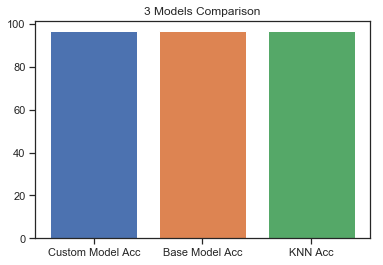

In [26]:
plt.bar("Custom Model Acc",custom_model_accuracy)
plt.bar("Base Model Acc",base_model_accuracy)
plt.bar("KNN Acc",knn_accuracy)
plt.yticks([0,20,40,60,80,100]) #y ekseninde görmek istediğimiz rakamlar
plt.title("3 Models Comparison")

plt.show()

<h2>Naive Bayes Sınıflandırma (Naive Bayes Classifier)</h2>

Naive Bayes sınıflandırma algoritması olabilecek her durum için olasılıkları hesaplar ve çıktı olarak en yüksek olasılığa sahip olan sınıfı seçer. Daha ayrıntılı bir açıklama için lütfen Bayes Teoremi’ni ve matematiksel modellemesini inceleyin. <br>

Üç farklı şekilde incelenebilir. <br>
1-) Gaussian: Bu genel bir sınıflandırmadır ve özelliklerin normal bir dağılım izlediğini varsayar. <br>
2-) Multinomial: Ayrık sayılar için kullanılır. <br>
3-) Bernoulli: İkili problemler için kullanılır, 0 ve 1 gibi veya bir e-postanın spam olup spam olmaması gibi.

Biz bu Iris veri seti için Gaussian modelini kullanacağız.

In [27]:
from sklearn.naive_bayes import GaussianNB

iris_gaussian = GaussianNB() #Modelimizi yarattık.
iris_gaussian.fit(train_X,train_y) #Modelimizi eğitiyoruz.

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
gaussian_predicts = iris_gaussian.predict(test_X)
#Tahminimizi gaussian_predicts adlı değişkende tutuyoruz.
#Hesaplama için daha önceden kullandığımız metodu kullanabiliriz.
true_predict = 0
for i in range(len(testy)):
    if(testy[i] == gaussian_predicts[i]):
        true_predict += 1
        
print('GaussianNB number of true predicts : ',true_predict)
print('Our implementation GaussianNB Accuracy for iris dataset : %',true_predict*100/len(testy))

#veya sklearn'in bize sağladığı başka bir seçenek
from sklearn.metrics import accuracy_score
gaussian_accuracy = accuracy_score(testy,gaussian_predicts)
print('Sklearns accuracy function GaussianNB Accuracy for iris dataset : %',gaussian_accuracy*100)
gaussian_accuracy = gaussian_accuracy*100

GaussianNB number of true predicts :  29
Our implementation GaussianNB Accuracy for iris dataset : % 96.66666666666667
Sklearns accuracy function GaussianNB Accuracy for iris dataset : % 96.66666666666667


Şimdi elimizde bir başka model ve onun bilirlik oranı var. Bu modeli de modelleri karşılaştırdığımız grafiğe ekleyebiliriz.

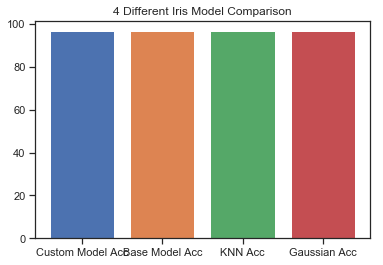

In [29]:
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('Gaussian Acc',gaussian_accuracy)
plt.title('4 Different Iris Model Comparison')
plt.show()

<h2>Destek Vektör Makineleri (Support Vector Machine (SVM))</h2>

SVM sınıfları (özellikleri) bir hiper düzlemle bölen makine öğrenmesi algoritmasıdır. <br>
Örnek: Eğer uzayımız iki boyutluysa (özellikli) iki sınıfımız vardır. Bu durumda hiper düzlem iki sınıfı birbirinden ayıran bir çizgi olacaktır. Aşağıdaki resimde görüldüğü üzere iki sınıf var: kırmızı yıldızlar ve mavi kareler. <br>


![graph](svmgraph.png)

In [30]:
from sklearn import svm

iris_svm = svm.SVC()
iris_svm.fit(train_X,train_y)

c:\users\lacin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Şimdi SVM algoritmasıyla özelleştirilmiş bir model yaratmak için kullanabileceğimiz bazı parametrelerden bahsetmek istiyorum. Kernel parametresiyle hiper düzlemimizin lineer, polinomiyal, vb. olup olmayacağına karar verebiliriz; yani hiper düzlemimizin yapısını belirleyebiliriz. <br>

C ve gama parametreleri de bizim için çok kullanışlı parametrelerdir. Bu iki parametreyi karşılaştıran parametreler var, isterseniz karşılaştırmayı siz de yapabilirsiniz.

In [31]:
svm_predict = iris_svm.predict(test_X)

svm_accuracy = accuracy_score(testy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for iris dataset : %",svm_accuracy)

SVM Accuracy for iris dataset : % 100.0


Tekrardan modellerimizi bir grafik üzerinde görelim.

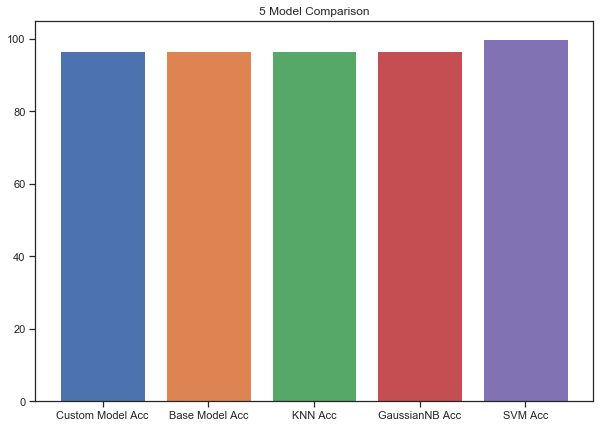

In [33]:
plt.figure(figsize =(10,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.title("5 Model Comparison")


plt.show()

<h2>Karar Ağacı (Decision Tree Classifier)</h2>

Karar Ağacı veri elemanlarını gruplara böler. Bu grupların etiketleri aynı olmalıdır, bu yüzden karar ağacı her grup aynı etiketi taşıyana kadar bir düğümü defalarca alt düğümlere böler. 

Amaç veri özelliklerinden elde edilen basit karar verme kurallarını öğrenip hedef değişkenin değerini tahmin etmektir.

In [34]:
from sklearn.tree import DecisionTreeClassifier
iris_decisiontree = DecisionTreeClassifier(criterion = 'entropy')

iris_decisiontree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
predictions_tree = iris_decisiontree.predict(train_X)
trainy = numpy.array(train_y)
predictions_tree = accuracy_score(trainy,predictions_tree)*100
print('Decision Tree Accuracy for iris dataset for train data : %',predictions_tree)
predictions_tree = iris_decisiontree.predict(test_X)
predictions_tree = accuracy_score(testy,predictions_tree)*100
print('Decision Tree Accuracy for iris dataset for test data : %',predictions_tree)

Decision Tree Accuracy for iris dataset for train data : % 100.0
Decision Tree Accuracy for iris dataset for test data : % 96.66666666666667


<h2>Rastgele Orman (Random Forest Classifier)</h2>

Rastgele Orman daha başarılı ve daha stabilize bir model yaratmak amacıyla Karar Ağaçlarını birleştirerek rastgele bir orman yaratır.

In [36]:
from sklearn.ensemble import RandomForestClassifier

iris_randomforest = RandomForestClassifier(n_estimators = 100) 
#n _estimators parametresiyle ormanda bulunmasını istediğimiz karar ağacı sayısını belirliyoruz.

iris_randomforest.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
randomforest_accuracy = iris_randomforest.score(test_X,test_y)*100
print('Random Forest Accuracy for iris dataset on test data : %',randomforest_accuracy)
print('Random Forest Accuracy for iris dataset on train data : %',iris_randomforest.score(train_X,train_y)*100)

Random Forest Accuracy for iris dataset on test data : % 96.66666666666667
Random Forest Accuracy for iris dataset on train data : % 100.0


<h3>Artık tüm modellerimizi aynı grafik üzerinde inceleyebilir ve hangisinin en yüksek bilirlik oranına sahip olduğunu görebiliriz.</h3>

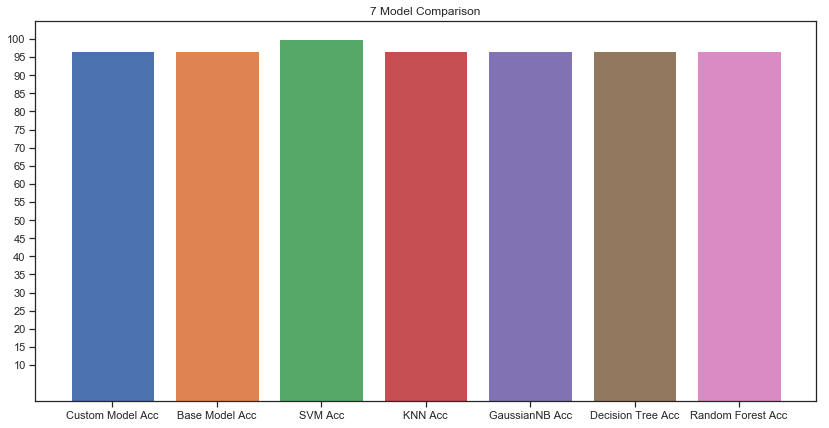

In [38]:
plt.figure(figsize =(14,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('GaussianNB Acc',gaussian_accuracy)
plt.bar('Decision Tree Acc',predictions_tree)
plt.bar('Random Forest Acc',randomforest_accuracy)
plt.yticks([i for i in range(10,105,5)])
plt.title("7 Model Comparison")

plt.show()

SVM modelimizin bilirlik oranı daha yüksek çıktı ve biz SVM modelimizin üzerinde duracağız. Veri setini özelleştirip SVM algoritmasını kullanarak yeni bir model oluşturacağız. Ardından yeni modelimizi özelleştirdiğimiz veri setiyle eğiteceğiz.

In [39]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


SepalLenghtCm ve SepalWidthCm’yi çarpıp Sepal sütununu oluşturacağız. Sonra PetalLenghtCm ve PetalWidthCm’yi çarpıp Petal sütununu oluşturacağız. Ardından modelimizi tekrardan eğiteceğiz

In [40]:
sepal = df.SepalLengthCm*df.SepalWidthCm
petal = df.PetalLengthCm*df.PetalWidthCm


dfnew =pandas.DataFrame( {'Sepal':sepal,'Petal':petal,'Species':df.Species})

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(dfnew.drop("Species",axis=1),dfnew.Species,test_size = 0.1)

In [42]:
newmodel = svm.SVC()
newmodel.fit(xtrain,ytrain)

c:\users\lacin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
predicts = newmodel.predict(xtest)
print('Our freestyle new models accuracy for test sets: %',accuracy_score(newmodel.predict(xtest),ytest)*100)

Our freestyle new models accuracy for test sets: % 100.0


Şimdi elimizde özelleştirdiğimiz modelimizin bilirlik oranı var. Hem modelimizin cevaplarını hem de doğru cevapları gösteren bir grafik oluşturacağız. Bu grafikte çizgilerin üzerinde olmayan noktalar (tahminler) yanlış cevapları gösteriyor.

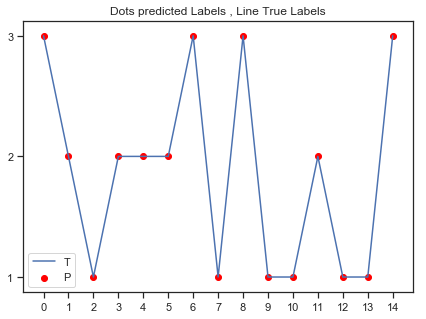

In [44]:
predict = []
ytest = numpy.array(ytest)
numeric = []
for i in ytest:
    if i == 'Iris-setosa':
        numeric.append(1)
    elif i=='Iris-versicolor':
        numeric.append(2)
    elif i=='Iris-virginica':
        numeric.append(3)
        
xnumbers = [i for i in range(len(ytest))]

for i in predicts:
    if i == 'Iris-setosa':
        predict.append(1)
    elif i=='Iris-versicolor':
        predict.append(2)
    elif i=='Iris-virginica':
        predict.append(3)
        

plt.figure(figsize=(7,5))

plt.title("Dots predicted Labels , Line True Labels")
plt.plot(numeric)
plt.scatter(xnumbers,predict,color = 'red')
plt.xticks([i for i in range(len(xnumbers))])
plt.yticks([1,2,3])
plt.legend("TP")

plt.show()

Gördüğünüz gibi tüm kırmızı noktalar çizginin üzerinde, yani hiç yanlış tahmin yok. Modelimizin verdiği tüm cevaplar doğru.

<h1>Sonuç</h1>

Sınıflandırma metoduyla 6 farklı makine öğrenme modeli oluşturduk. Iris veri setinde çok fazla veri yok ve pek karmaşık değil, bu da bizim çok detaylı bir model oluşturmadan da iyi sonuçlar elde etmemizi sağladı. Iris veri setinde en verimli modelin SVM modeli olduğunu gördük. Sonrasında özelleştirilmiş bir modelin verimliliğini görmek için yeni özelliklerle yeni bir model yarattık. 

Size _Denetimli Öğrenme_’yi daha ayrıntılı bir şekilde araştırmanızı öneriyorum. Burada yalnızca _Sınıflandırma_ metodundan bahsettik, ancak bir de öğrenilmesi gerektiğini düşündüğüm _Regresyon_ metodu var. 

___Okuduğunuz için teşekkürler. :)___

<h1>Kaynakça</h1>

[SVM Hiper Düzlem](https://www.google.com/search?biw=1536&bih=728&tbm=isch&sa=1&ei=jCs7XOzDPMKmsgHrxY1Q&q=svm+hyperplane+line&oq=svm+hyperplane+line&gs_l=img.3...58886.62261..62520...1.0..0.203.2015.0j11j2......1....1..gws-wiz-img.......35i39j0j0i30j0i19j0i8i30i19.z-MzU-_G3y8#imgrc=eW0gIHHLvC6VqM:) <br>
[Plotly Görselleştirme Kütüphanesi](https://plot.ly) <br>
    [Seaborn Görselleştirme Kütüphanesi](https://seaborn.pydata.org) <br>
   [Matplotlib Görselleştirme Kütüphanesi](https://matplotlib.org) <br>
    [Makine Öğrenme Algoritmaları için (sklearn)](https://scikit-learn.org) <br>
    [Daha Ayrıntılı Bilgi için (medium)](https://www.medium.com) <br>
    [Daha Ayrıntılı Bilgi için (towardsdatascience)](https://www.towardsdatascience.com) <br>
    [Daha Ayrıntılı Bilgi için (Analyticsvidhya)](https://www.analyticsvidhya.com)